In [1]:
import pandas as pd
import numpy as np

In [9]:
df=pd.read_csv("hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv",low_memory=False)
print(df.columns)

Index(['index', 'Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility ID', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Source of Payment 1', 'Source of Payment 2', 'Source of Payment 3',
       'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')


# Calculate summary statistics for numeric columns

In [12]:
numeric_columns = ['Length of Stay', 'Birth Weight', 'Total Charges', 'Total Costs']
print("Summary statistics for numeric columns:")
print(df[numeric_columns].describe())

Summary statistics for numeric columns:
       Birth Weight  Total Charges   Total Costs
count  2.622133e+06   2.622133e+06  2.622133e+06
mean   3.103701e+02   2.945920e+04  1.186523e+04
std    9.769686e+02   5.640021e+04  2.727029e+04
min    0.000000e+00   1.000000e-02  0.000000e+00
25%    0.000000e+00   7.900000e+03  3.290510e+03
50%    0.000000e+00   1.567373e+04  6.175350e+03
75%    0.000000e+00   3.172352e+04  1.222803e+04
max    9.900000e+03   1.206004e+07  1.470885e+07


# Data Visualization

### Histograms for numeric variables

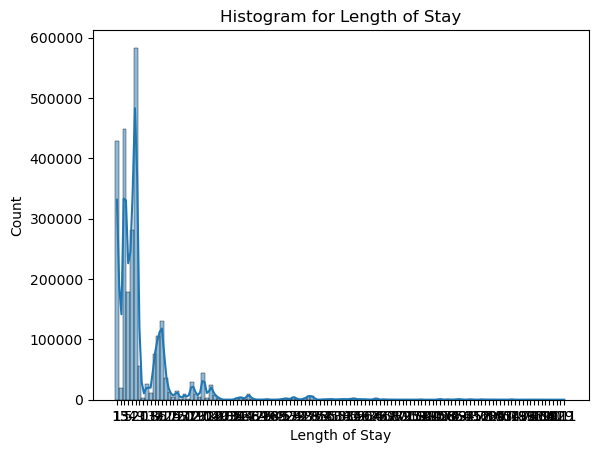

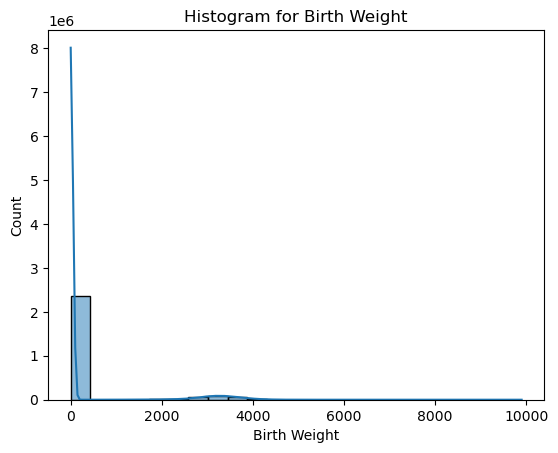

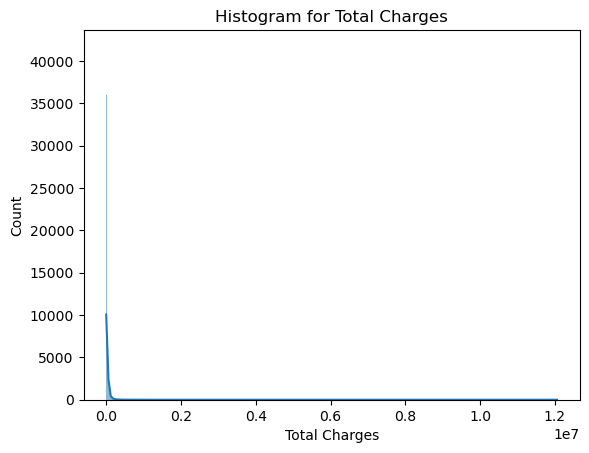

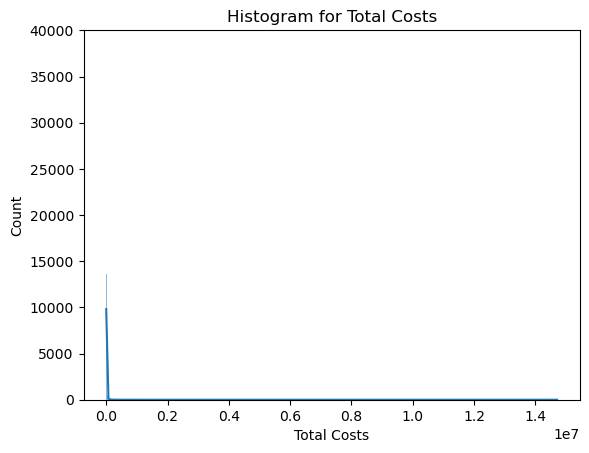

In [14]:
for col in numeric_columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram for {col}')
    plt.show()

# Bar charts for categorical variables

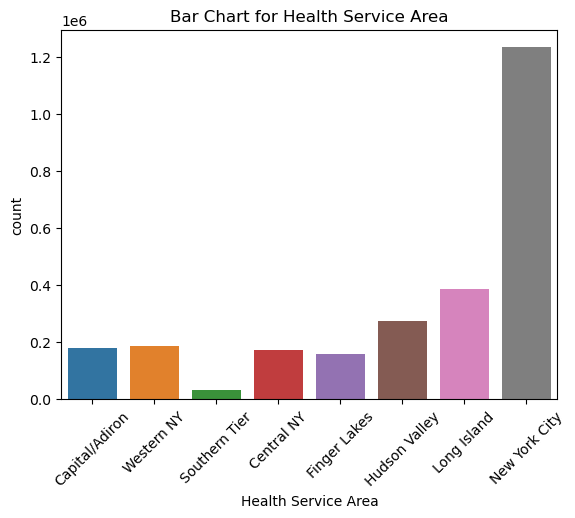

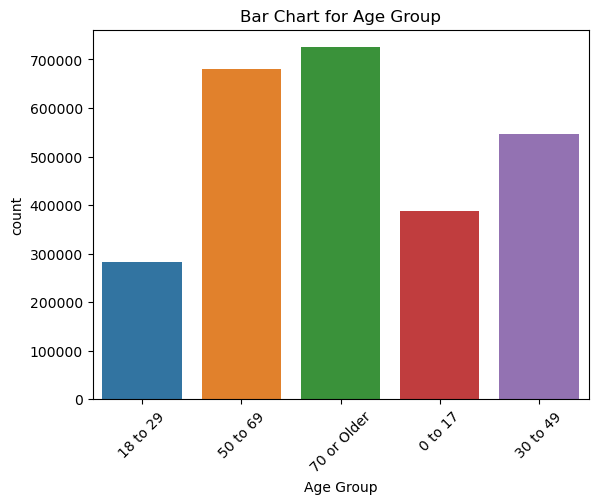

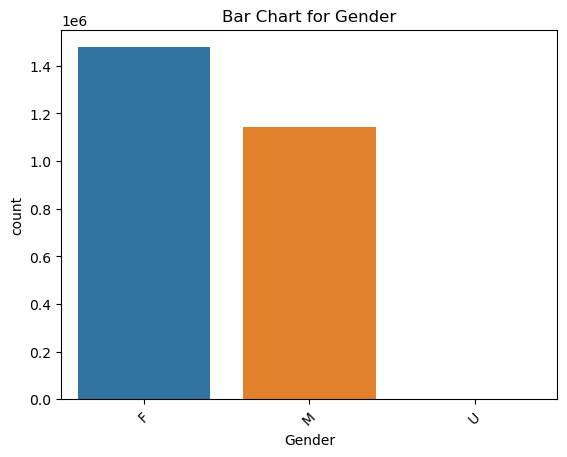

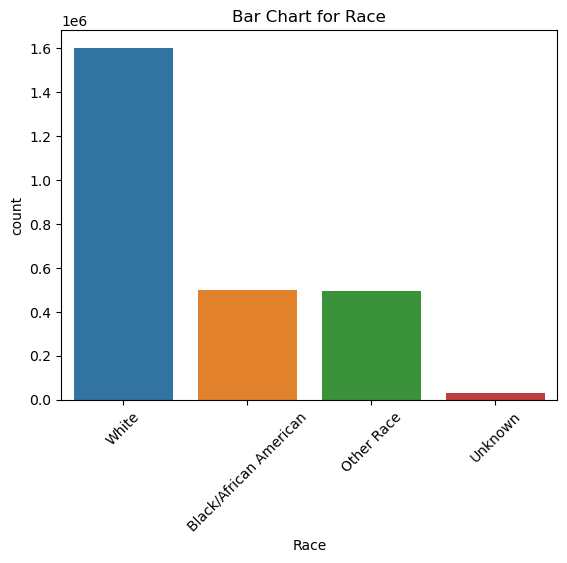

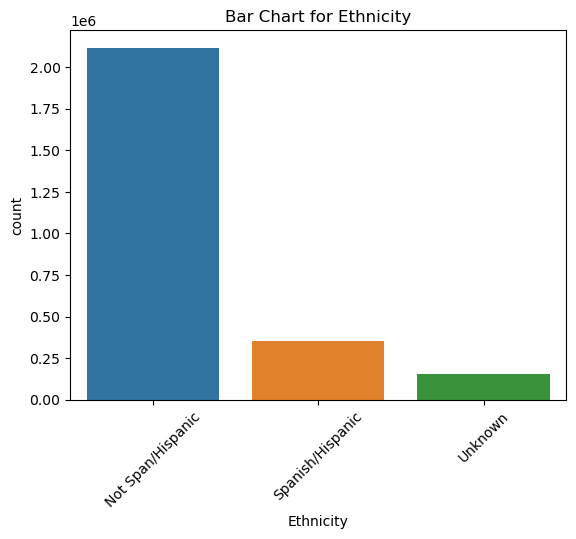

In [15]:
categorical_columns = ['Health Service Area', 'Age Group', 'Gender', 'Race', 'Ethnicity']
for col in categorical_columns:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.title(f'Bar Chart for {col}')
    plt.xticks(rotation=45)
    plt.show()

# Outlier Detection

## Box plots for 'Total Charges' and 'Total Costs'

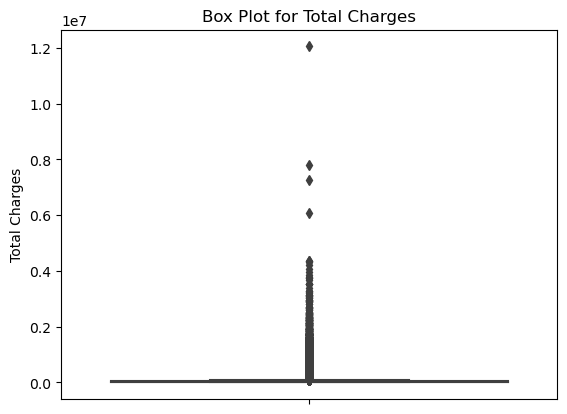

In [16]:
plt.figure()
sns.boxplot(data=df, y='Total Charges')
plt.title('Box Plot for Total Charges')
plt.show()

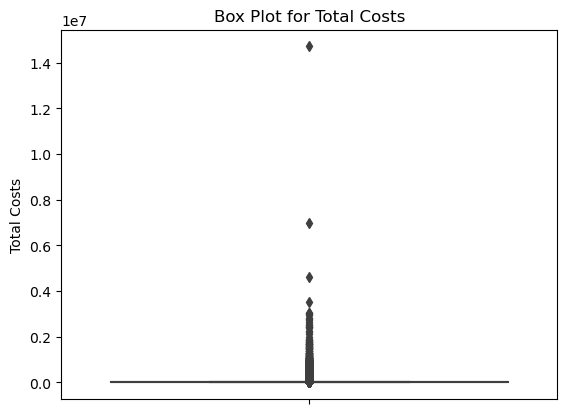

In [17]:
plt.figure()
sns.boxplot(data=df, y='Total Costs')
plt.title('Box Plot for Total Costs')
plt.show()

# Correlation Analysis

In [18]:
correlation_matrix = df[numeric_columns].corr()

/var/folders/vb/7v04222s5mb08qhr_0x7z1zm0000gn/T/ipykernel_2460/185048333.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[numeric_columns].corr()


## Create a heatmap to visualize correlations

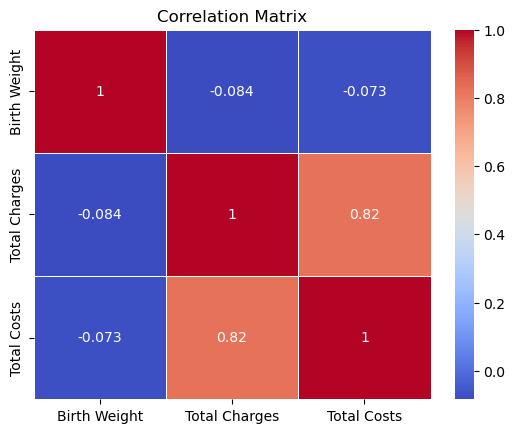

In [19]:
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Data Distribution Analysis
 ## Check normality of 'Total Charges' using a Q-Q plot

In [21]:
from scipy import stats
import pylab

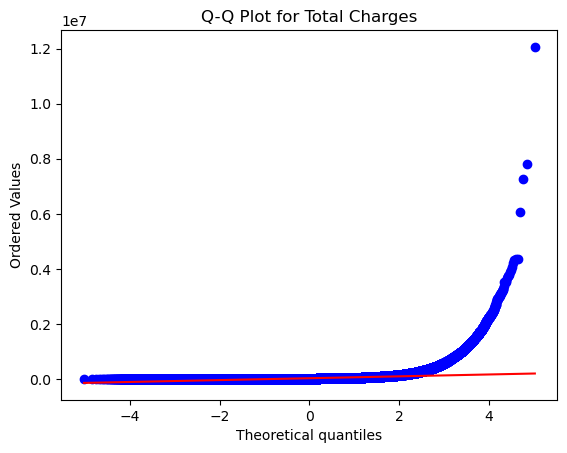

In [22]:
plt.figure()
stats.probplot(df['Total Charges'], dist="norm", plot=pylab)
plt.title('Q-Q Plot for Total Charges')
plt.show()

# Hypothesis Generation
## Generate a hypothesis to test the relationship between 'Length of Stay' and 'Total Charges'

In [23]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df['Length of Stay'], df['Total Charges'])
print("Correlation:", correlation)
print("P-value:", p_value)


TypeError: unsupported operand type(s) for +: 'float' and 'str'

# Data Cleaning 
## Handle missing data (example: fill missing values in 'Age Group' with the mode)

In [25]:
df['Age Group'].fillna(df['Age Group'].mode()[0], inplace=True)


 ## Remove duplicates (example: remove duplicate rows)

In [26]:
df.drop_duplicates(inplace=True)